┌ Info: Saved animation to 
│   fn = /home/mergen/workspace/jupyter/julia/tmp.gif
└ @ Plots /home/mergen/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/mergen/workspace/jupyter/julia/tmp.gif")
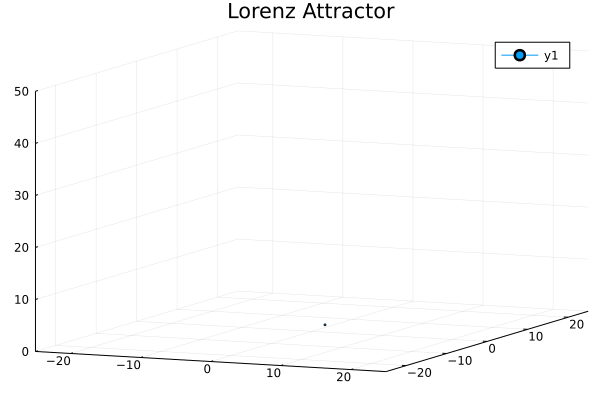

In [1]:
using Plots
# define the Lorenz attractor
mutable struct Lorenz
    dt; σ; ρ; β; x; y; z
end

function step!(l::Lorenz)
    dx = l.σ*(l.y - l.x)       ; l.x += l.dt * dx
    dy = l.x*(l.ρ - l.z) - l.y ; l.y += l.dt * dy
    dz = l.x*l.y - l.β*l.z     ; l.z += l.dt * dz
end

attractor = Lorenz((dt = 0.02, σ = 10., ρ = 28., β = 8//3, x = 1., y = 1., z = 1.)...)


# initialize a 3D plot with 1 empty series
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10


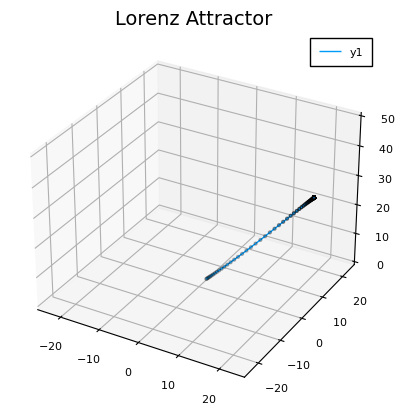

┌ Info: Saved animation to 
│   fn = /home/mergen/workspace/jupyter/julia/tmp.gif
└ @ Plots /home/mergen/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/home/mergen/workspace/jupyter/julia/tmp.gif")
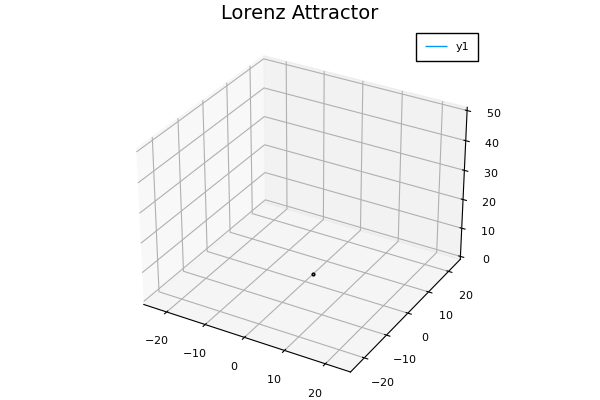

In [4]:
using Plots

mutable struct Lorenz
   h; a; b; c; x; y; z
end


function step!(l::Lorenz)
    x(x,y,z) = -l.a * (x - y)
    y(x,y,z) = -x * z + l.b * x - y
    z(x,y,z) = x * y - l.c * z

    xf1 = x(l.x[end],l.y[end],l.z[end])
    yf1 = y(l.x[end],l.y[end],l.z[end])
    zf1 = z(l.x[end],l.y[end],l.z[end])
    xf2 = x(l.x[end] + l.h/2 * xf1, l.y[end] + l.h/2 * yf1, l.z[end] + l.h/2 * zf1)
    yf2 = y(l.x[end] + l.h/2 * xf1, l.y[end] + l.h/2 * yf1, l.z[end] + l.h/2 * zf1)
    zf2 = z(l.x[end] + l.h/2 * xf1, l.y[end] + l.h/2 * yf1, l.z[end] + l.h/2 * zf1)
    xf3 = x(l.x[end] + l.h/2 * xf2, l.y[end] + l.h/2 * yf2, l.z[end] + l.h/2 * zf2)
    yf3 = y(l.x[end] + l.h/2 * xf2, l.y[end] + l.h/2 * yf2, l.z[end] + l.h/2 * zf2)
    zf3 = z(l.x[end] + l.h/2 * xf2, l.y[end] + l.h/2 * yf2, l.z[end] + l.h/2 * zf2)
    xf4 = x(l.x[end] + l.h * xf3, l.y[end] + l.h * yf3, l.z[end] + l.h * zf3)
    yf4 = y(l.x[end] + l.h * xf3, l.y[end] + l.h * yf3, l.z[end] + l.h * zf3)
    zf4 = z(l.x[end] + l.h * xf3, l.y[end] + l.h * yf3, l.z[end] + l.h * zf3)

    append!(l.x, l.x[end] + l.h / 6 * (xf1 + 2xf2 + 2xf3 + xf4))
    append!(l.y, l.x[end] + l.h / 6 * (yf1 + 2yf2 + 2yf3 + yf4))
    append!(l.z, l.x[end] + l.h / 6 * (zf1 + 2zf2 + 2zf3 + zf4))
end

attractor = Lorenz((h = 0.02, a = 10., b = 28., c = 8//3, x = [1.], y = [1.], z = [1.])...)

pyplot()
plt = plot3d(1, xlim=(-25,25), ylim=(-25,25), zlim=(0,50),
                title = "Lorenz Attractor", marker = 2)

@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x[end], attractor.y[end], attractor.z[end])
end every 10